In [1]:
import numpy as np # for array, linear algebra
import pandas as pd # for data processing
import matplotlib as mpl  # to visualize data
import matplotlib.pyplot as plt # to crreate stat and visualize data
import matplotlib.colors as mcolors # to visualize colors
import seaborn as sns # to visualize data
from sklearn.feature_extraction.text import TfidfVectorizer # to transfrom the text into numbers
from sklearn.metrics import * # to calculate the metrics
import pickle # to export the model for testing


import lightgbm as lgb # model that is used

pd.set_option('display.max_colwidth', None)

In [2]:
lgbm_with_stopwords = pd.read_csv('../../../../Data-Preparation/sentiment140/traindata_with_stopwords_preprocessed.csv')
lgbm_with_stopwords['Text'].astype(str)

0                               Rise and shining lol. I'm up a few mins later then planned but no rush i'll be out the door in time 
1                                                                                Had a 2nd interview today. It's looking promising. 
2                                                                                                  @EmilyAlbracht I feel your pain! 
3          http://twitpic.com/6sdbj - 4yr old son and I went exploring &amp; hiking today and this is what we found  Luv amphibians!
4                                                                          is lonely because all my housemates have gone to the pub 
                                                                     ...                                                            
1279995                                                                            Being held together by bubblegum &amp; blessings 
1279996                                                              

In [3]:
# load the vectorizer from file
with open('../../../../Data-Preparation/sentiment140/tfidf_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)
print(loaded_vectorizer)

TfidfVectorizer()


In [4]:
X = loaded_vectorizer.transform(lgbm_with_stopwords['Text'].astype(str))
y = lgbm_with_stopwords['target']

### without Hyperparametertuning

In [5]:
model1 = lgb.LGBMClassifier()
model1.fit(X, y)

[LightGBM] [Info] Number of positive: 640000, number of negative: 640000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 38.461117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 374040
[LightGBM] [Info] Number of data points in the train set: 1280000, number of used features: 27629
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [6]:
lgbm_with_stopwords['Prediction1'] = model1.predict(X)
lgbm_with_stopwords.head()

,Text,target,Ground_Truth_Label,Prediction1
0,Rise and shining lol. I'm up a few mins later then planned but no rush i'll be out the door in time,4,positive,0
1,Had a 2nd interview today. It's looking promising.,4,positive,4
2,@EmilyAlbracht I feel your pain!,0,negative,0
3,http://twitpic.com/6sdbj - 4yr old son and I went exploring &amp; hiking today and this is what we found Luv amphibians!,4,positive,4
4,is lonely because all my housemates have gone to the pub,0,negative,0


### with Hyperparametertuning

In [7]:
model2 = lgb.LGBMClassifier(
    num_leaves=300,
)
model2.fit(X, y)

[LightGBM] [Info] Number of positive: 640000, number of negative: 640000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 41.885562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 374040
[LightGBM] [Info] Number of data points in the train set: 1280000, number of used features: 27629
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(num_leaves=300)

In [8]:
lgbm_with_stopwords['Prediction2'] = model2.predict(X)
lgbm_with_stopwords.head()

,Text,target,Ground_Truth_Label,Prediction1,Prediction2
0,Rise and shining lol. I'm up a few mins later then planned but no rush i'll be out the door in time,4,positive,0,4
1,Had a 2nd interview today. It's looking promising.,4,positive,4,4
2,@EmilyAlbracht I feel your pain!,0,negative,0,0
3,http://twitpic.com/6sdbj - 4yr old son and I went exploring &amp; hiking today and this is what we found Luv amphibians!,4,positive,4,4
4,is lonely because all my housemates have gone to the pub,0,negative,0,0


### evaluation

In [9]:
# calculate metrics
accuracy = accuracy_score(lgbm_with_stopwords['target'], lgbm_with_stopwords['Prediction1'])
precision = precision_score(lgbm_with_stopwords['target'], lgbm_with_stopwords['Prediction1'], pos_label=4)
recall = recall_score(lgbm_with_stopwords['target'], lgbm_with_stopwords['Prediction1'], pos_label=4)
f1 = f1_score(lgbm_with_stopwords['target'], lgbm_with_stopwords['Prediction1'], pos_label=4)

# visualize metrics
print('LGBM without Hyperparametertuning')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print()



# calculate metrics
accuracy_2 = accuracy_score(lgbm_with_stopwords['target'], lgbm_with_stopwords['Prediction2'])
precision_2 = precision_score(lgbm_with_stopwords['target'], lgbm_with_stopwords['Prediction2'], pos_label=4)
recall_2 = recall_score(lgbm_with_stopwords['target'], lgbm_with_stopwords['Prediction2'], pos_label=4)
f1_2 = f1_score(lgbm_with_stopwords['target'], lgbm_with_stopwords['Prediction2'], pos_label=4)

# visualize metrics
print('LGBM with Hyperparametertuning')
print(f'Accuracy: {accuracy_2:.2f}')
print(f'Precision: {precision_2:.2f}')
print(f'Recall: {recall_2:.2f}')
print(f'F1 Score: {f1_2:.2f}')

LGBM without Hyperparametertuning
Accuracy: 0.76
Precision: 0.74
Recall: 0.80
F1 Score: 0.77

LGBM with Hyperparametertuning
Accuracy: 0.81
Precision: 0.80
Recall: 0.82
F1 Score: 0.81


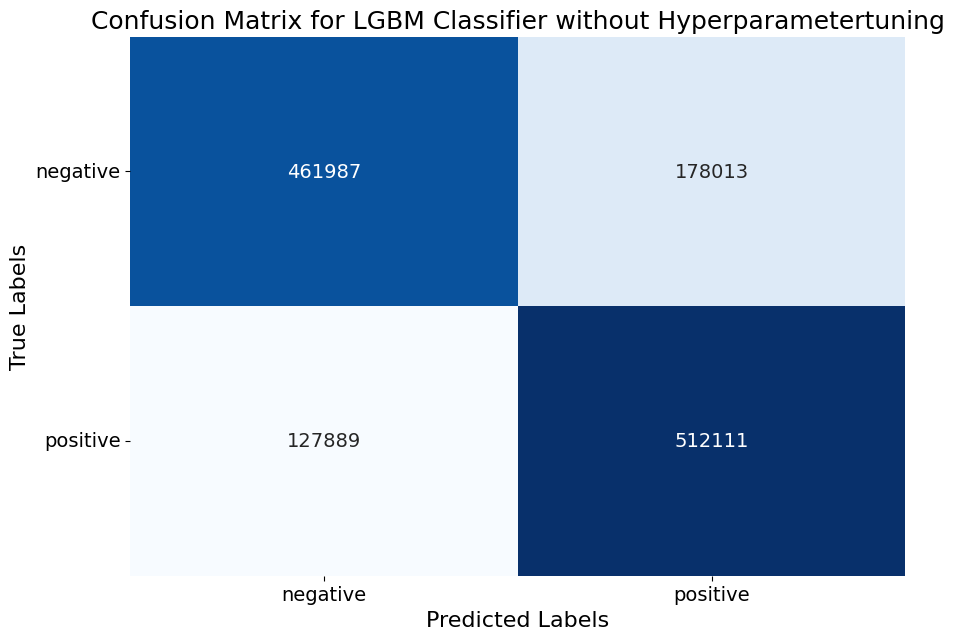

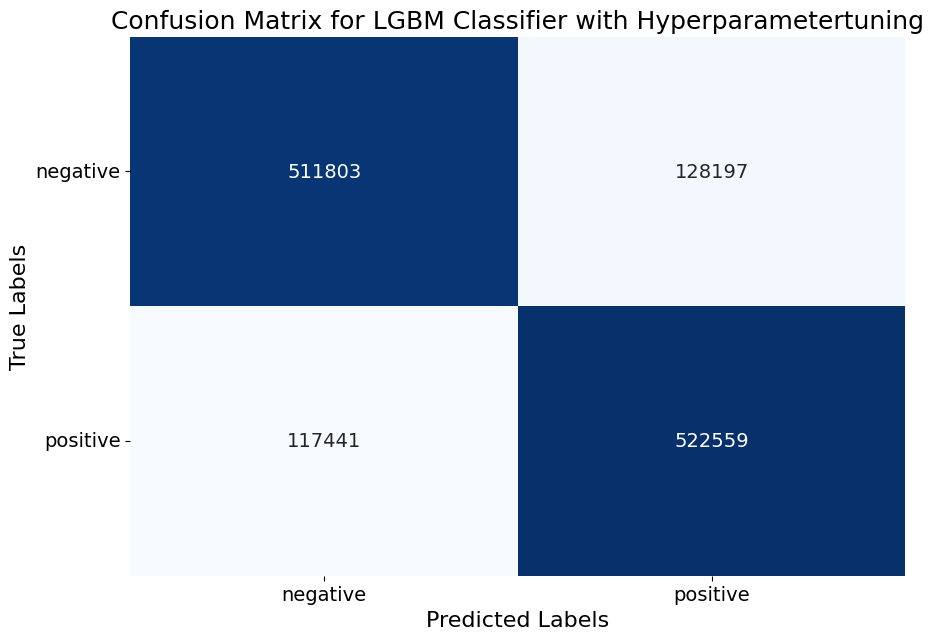

In [10]:
cm_nb = confusion_matrix(lgbm_with_stopwords['target'], lgbm_with_stopwords['Prediction1'])


# creation of the Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for LGBM Classifier without Hyperparametertuning', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()


cm_nb = confusion_matrix(lgbm_with_stopwords['target'], lgbm_with_stopwords['Prediction2'])


# creation of the Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for LGBM Classifier with Hyperparametertuning', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()

### export better model

In [11]:
# model2 (with Hyperparametertuning) is exported since accuracy is higher
with open('lgbm_model_with_stopwords.pkl', 'wb') as file:
    pickle.dump(model2, file)